## 朴素贝叶斯算法
- 概率基础
- 算法介绍

### 引出
- 在许多分类算法应用中，特征和标签之间的关系并非是决定性的。比如说，我们想预测一个人究竟是否会在泰坦尼克号海难中生存下来，那我们可以建立某个分类模型来学习我们的训练集。在训练中，其中一个人的特征为:30岁，男，普 通舱，他最后在泰坦尼克号海难中去世了。当我们测试模型的时候，我们发现有另一个人的特征也为:30岁，男，普通 舱。基于模型在训练集中的学习，模型必然会给这个人打上标签:去世。然而这个人的真实情况一定是去世了吗?并非如此。也许这个人是心脏病患者，得到了上救生艇的优先权。又有可能，这个人就是挤上了救生艇，活了下来。那么这个模型来说，基于训练的经验，这个人“很有可能”是没有活下来，但算法永远也无法确定”这个人一定没有活下来“。即便这个人最后真的没有活下来，算法也无法确定基于训练数据给出的判断，是否真的解释了这个人没有存活下来的真实情况。
- 这就是说，算法得出的结论，永远不是100%确定的，更多的是判断出了一种“样本的标签更可能是某类的可能性”，而非一种“确定”。我们通过模型算法的某些规定，来强行让算法为我们返回一个固定的分类结果。但许多时候，我们也希望能够理解算法判断出结果的可能性概率，比如：
    - 文章分类，希望【可以得出】该文章可以【分到】财经，体育，社会这几种不同【类别】的【概率】，而不是只返回一个冷冰冰的分类结果。
- 无论如何，我们都希望使用真正的概率来衡量可能性，因此就有了真正的概率算法:朴素贝叶斯。
- 【朴素贝叶斯是一种直接衡量标签和特征之间的概率关系的有监督学习算法，是一种专注分类的算法】。朴素贝叶斯的算法根源就是基于概率论和数理统计的【贝叶斯推断】，因此它是根正苗红的概率模型。

- 什么是贝叶斯推断/算法
    - 贝叶斯推断（Bayesian inference）是一种统计学方法，用来估计统计量的某种性质。它是贝叶斯定理（Bayes' theorem）的应用。英国数学家托马斯·贝叶斯（Thomas Bayes）在1763年发表的一篇论文中，首先提出了这个定理。
    - 贝叶斯推断与其他统计学推断方法截然不同。它建立在主观判断的基础上，也就是说，你可以不需要客观证据，先估计一个值，然后根据实际结果不断修正。正是因为它的主观性太强，曾经遭到许多统计学家的诟病。
    - 贝叶斯推断需要大量的计算，因此历史上很长一段时间，无法得到广泛应用。只有计算机诞生以后，它才获得真正的重视。人们发现，许多统计量是无法事先进行客观判断的，而互联网时代出现的大型数据集，再加上高速运算能力，为验证这些统计量提供了方便，也为应用贝叶斯推断创造了条件，它的威力正在日益显现。

- 什么是贝叶斯推断？
    - 要理解贝叶斯推断，必须先理解贝叶斯定理。
    - 什么是贝叶斯定理？
        - 贝叶斯定理中必要要知道什么是先验概率和后验概率。
        - 什么是先验概率和后验概率？举个例子：
            - 假设我们出门堵车的可能因素有两个：车辆太多和交通事故。
            - 先验概率：
                - 堵车的概率就是先验概率（不管有没有其他事件的发生造成的堵车）
            - 后验概率/条件概率：
                - 当准备出门前，听到新闻里说路上发生了交通事故，那现在计算在发生事故后堵车的概率就是后验概率。也就是P(堵车|交通事故)。这是有因求果。
    - 贝叶斯推断的含义就是：我们先预估一个"先验概率"（预估堵车的概率），然后加入实验结果（发生事故造成了堵车），看这个实验到底是增强还是削弱了"先验概率"，由此得到更接近事实的"后验概率"。
        - 实验结果就是后验概率，也就是事实上发生堵车的概率。如果先验概率越接近后验概率说明，在不知情的情况下发生堵车概率也就是先验概率越准确。因此得知：
            - 先验概率是指根据以往经验和分析得到的概率
            - 后验概率是指依据得到"结果"所计算出的最有可能是哪种事件发生的概率。
                - 先验概率越接近后验概率说明以往积累的经验分析得到的概率越高，经验越准确。这种经验估计事件发生概率也叫做“最大似然估计”。

- 深入理解案例：最大似然估计（经验判定事件发生的概率）
    - 有一天，有个病人到医院看病。他告诉医生说自己头痛，然后医生根据自己的经验判断出他是感冒了，然后给他开了些药回去吃。这个例子跟我们提及到的最大似然估计有什么关系呢？
        - 关系可大了，事实上医生在不知不觉中就用到了最大似然估计。
        - 大家知道，头痛的原因有很多种啊，比如感冒，中风，脑溢血，脑残。那么医生凭什么说那个病人就是感冒呢？哦，医生说这是我从医多年的经验啊。
        - 咱们从概率的角度来研究一下这个问题。其实医生的大脑是这么工作的：
            - 他计算了一下
                - P(感冒|头痛)【头痛由感冒引起的概率】
                - P(中风|头痛)【头痛由中风引起的概率】
                - P(脑溢血|头痛)【头痛由脑溢血引起的概率】
                - ...
            - 然后这个计算机大脑发现，P(感冒|头痛)是最大的，因此就认为呢，病人是感冒了。看到了吗？这个就叫最大似然估计。
            - 咱们再思考一下，P(感冒|头痛)，P(中风|头痛)，P(脑溢血|头痛)是先验概率还是后验概率呢？
                - 没错，就是后验概率。看到了吧，后验概率可以用来看病。
            - 事实上，后验概率起了这样一个用途，根据一些发生的事实，分析结果产生的最可能的原因，然后才能有针对性地去解决问题。
        - 那么先验概率有啥用呢？
            - 我们来思考一下，P(脑残|头痛)是怎么算的。
                - P(脑残|头痛)=头痛的人中脑残的人数/头痛的人数
                - 头痛的样本倒好找，但是头痛的人中脑残的人数就不好调查了吧。如果你去问一个头痛的人你是不是脑残了，我估计那人会把你拍飞吧。
                - 接下来先验概率就派上用场了。
                - 根据概率公式我们可以知道：P(B|A)=P(A|B)P(B)/P(A)
                    - B表示脑残，A表示头痛。
                    - 因此P(脑残|头痛)=P(头痛|脑残)P(脑残)/P(头痛)
                    - 注意，P（头痛|脑残）就是先验概率（在脑残中找头痛的即可），那么利用概率公式我们就可以利用先验概率把后验概率算出来了。
        - 总结：后验概率在实际中一般是很难直接计算出来的，相反先验概率就容易多了。因此一般会利用先验概率来计算后验概率。

- 贝叶斯就是考虑一件事情发生的概率是多少，然后在模型训练中不断通过加入实验结果让先验概率（贝叶斯返回的结果）更加靠近真实的后验概率！

### 概率基础
- 概念：概率定义为一件事情发生的可能性。
    - 扔一个硬币，正面朝上
    - 某天是阴天

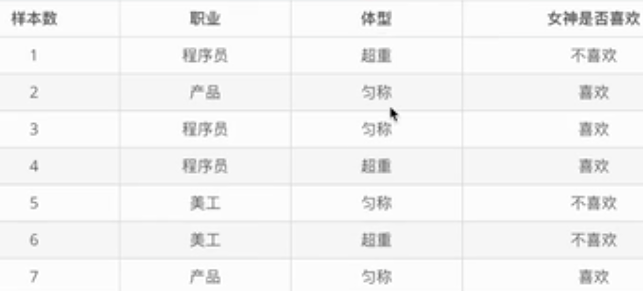

- 女神喜欢一个人的概率：
    - 4/7
- 职业是程序员并且体型匀称的概率：
    P(程序员，匀称) = 3/7 * 4/7 = 12/49
- 在女神喜欢的条件下，职业是程序员的概率：
    P(程序员|女神喜欢) = 1/2
- 在女神喜欢的条件下，职业是产品，体重超重的概率：
    P(产品，超重|女神喜欢) = 1/2 * 1/4 = 1/8


- 概率计算准则：联合概率和条件概率
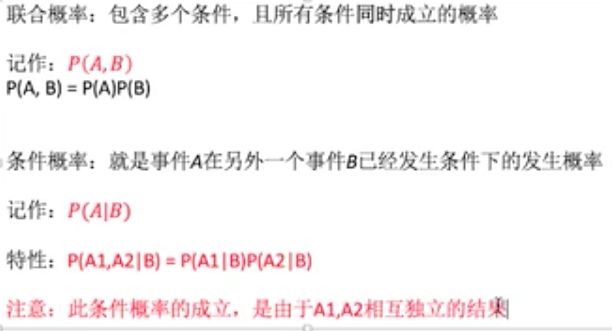


- 注意：
    - 上述的求概率公式只适用于各个特征之间是条件独立（每个特征之间没有必然关系）的。条件不独立指的是特征之间有关联的比如，体重和是否喜欢吃零食这两个条件之间就有关联。
    - 朴素贝叶斯只适用于特诊之间是【条件独立】的情况下。否则分类效果不好。这里的朴素指的就是条件独立
    - 朴素贝叶斯主要被广泛的适用于文档分类中！

### 朴素贝叶斯的分类
- 在sk-learn中提供了三种不同类型的贝叶斯模型算法
    - 高斯模型
    - 多项式模型
    - 伯努利模型

#### 高斯模型【用于连续型变量】
- 高斯分布：
    - 大家在学习高等数学时，应该学过高斯分布，也就是正态分布，是一种连续型变量的概率分布。简单来说，高斯分布就是当频率直方图的区间变得特别小时的拟合曲线，像座小山峰，其中两端的特别小，越往中间越高。
    - 高斯分布有时也被称为正态分布，是一种在自然界大量的存在的、最为常见的分布形式。 现实生活中有很多现象均服从高斯分布，比如收入，身高，体重等，大部分都处于中等水平，特别少和特别多的比例都会比较低。
    - 高斯分布也可以说是一种连续型变量的概率分布。在提供精确数学定义前，先用一个简单的例子来说明。

- 如果我们对大量的人口进行身高数据的随机采样，并且将采得的身高数据画成柱状图，将会得到如下图1所示的图形。这张图模拟展示了334个成人的统计数据，可以看出图中最多出现的身高在180cm左右2.5cm的区间里。
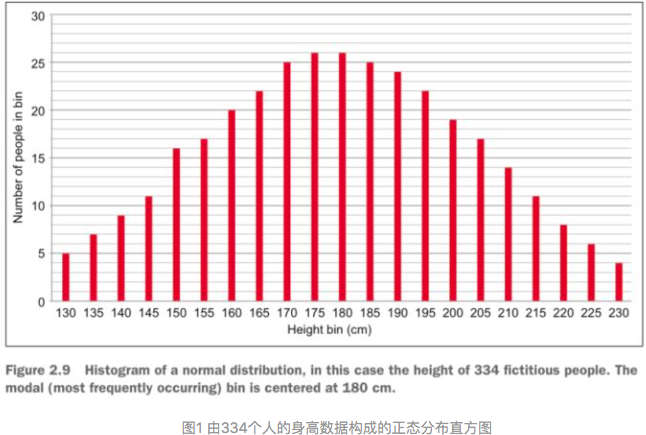

- 这个图形非常直观的展示了高斯分布的形态。接下来看下严格的高斯公式定义，高斯分布的概率密度函数公式如下：
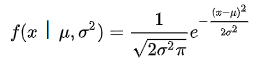
    - 公式中包含两个参数，参数 μ 表示均值，𝛔参数表示标准差，均值对应正态分布的中间位置，在本例中我们可以推测均值在180cm附近。标准差衡量了数据围绕均值分散的程度。
    - 学过大学高数的同学应该还记得，正态分布的一个背景知识点是，95%的数据分布在均值周围2个标准差的范围内。本例中大约20到30左右是标准差参数的取值，因为大多数数据都分布在120cm到240cm之间。
    - 上面的公式是概率密度函数，也就是在已知参数的情况下，输入变量指x，可以获得相对应的概率密度y。
        - 比如x=170cm,带入公式可以返回x在正太分布数据集中的密度/概率（一个人身高为170的概率）


- 一起玩一个游戏抛硬币，游戏规则为：
    - 定义每个抛出硬币正面记+1分，反面记-1分
    - 此时我们可以得知抛一次硬币为正面的概率和为反面的概率各位50%，那也就是会有一半概率+1分，一半概率-1分。
- 如果我们连续抛10次硬币，则得到的记分统计为：
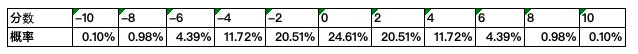

- 当然，同样画个图感受一下：
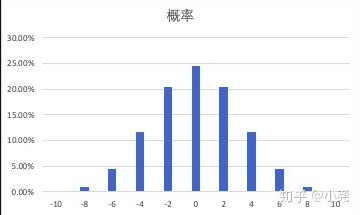

- 如果抛100次，甚至是无穷多次呢？平均分数分布情况大概是什么样呢？画个图感受一下：
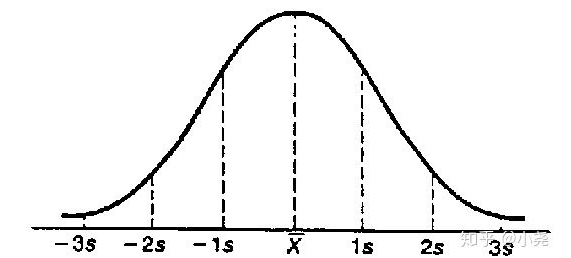
     ---发现，某一事件发生的概率出现了正太分布

- 为什么在我们的现实生活中正太分布如此常见呢？
    - 通常情况下一个事物的影响因素往往有多个，比如身高的影响有：
        - 家庭的饮食习惯
        - 家庭长辈的身高
        - 运动情况
        - ......
    - 其中的每一个因素，都会对身高产生一定的影响，要么是正向的影像，要么是反向的影响。所有因素最终让整体身高接近于正太分布。
    - 在数学中正太分布往往被称为高斯分布

- 总结：
    - 正太分布就是一种连续性变量的概率分布
    - 一个事件发生（样本属于哪个类别）的概率也满足正太分布

- 高斯模型
    - 通过假设P(xi|Y)是服从高斯分布(也就是正态分布)，来估计训练集数据的每个样本特征分到每个类别Y上的条件概率。对于每个样本特征下的对应每个分类结果概率的取值，高斯朴素贝叶斯有如下公式:    
    - exp函数为高等数学里以自然常数e为底的指数函数
    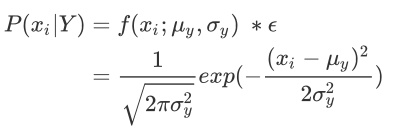
        - 对于任意一个Y的取值，高斯函数都以求解最大化的P为目标，这样我们才能够比较在不同标签下我们的样本究竟更靠近哪一个取值。

- 回忆之前的例子：比如x=170cm,带入公式可以返回x在正太分布数据集中的密度/概率（一个人身高为170的概率）。这里的x就可以当做是我们训练模型的一行样本。将所有样本带入高斯函数中，就可以求出所有样本的标准差和均值，则就可以计算未知样本归属不同类别的概率了。

- 高斯模型API
    - from sklearn.naive_bayes import GaussianNB 
         - 实例化模型对象的时候，我们【不需要对高斯朴素贝叶斯类输入任何的参数】，可以说是一个非常轻量级的类，操作非常容易。但过于简单也意味着贝叶斯没有太多的参数可以调整，因此贝叶斯算法的成长空间并不是太大，【如果贝叶斯算法的效果不是太理想，我们一般都会考虑换模型】。

- 高斯模型作用在手写数字识别案例中

In [3]:
from sklearn import datasets as dt
from sklearn.model_selection import train_test_split
data = dt.load_digits()

feature = data.data
target = data.target

In [5]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)

In [6]:
#NB做分类用效果更好
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
nb = GaussianNB().fit(x_train,y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [7]:
knn.score(x_test,y_test),nb.score(x_test,y_test)

(0.9888888888888889, 0.8194444444444444)

- 基于高斯模型求解分类概率

In [13]:
nb.predict(x_test[5].reshape((1,-1))) #返回分类的结果

nb.predict_proba(x_test[5].reshape((1,-1))) #返回分类的概率

#nb.predict_log_proba(x_test[5].reshape((1,-1)))

array([[0.00000000e+00, 0.00000000e+00, 5.00117729e-19, 1.48184345e-12,
        0.00000000e+00, 9.99999985e-01, 0.00000000e+00, 0.00000000e+00,
        1.49363938e-08, 8.85542468e-53]])

属性说明：

class_prior_：一个数组，形状为n_class，是每个类别的概率P（y=Ck）。

class_count_： 一个数组，形状也为n_class，是每个类别包含的训练样本的数量

theta_：一个数组，形状为（n_class,n_features），是每个类别上每个特征的均值。

sigma： 一个数组，形状为（n_class,n_features），是每个类别上每个特征的标准差。

In [14]:
#查看概率，高斯模型更适合二分类，在此十分类中表现一般，
nb.class_prior_

array([0.10160056, 0.10577592, 0.10160056, 0.09812109, 0.10020877,
       0.10020877, 0.09533751, 0.10090466, 0.09324983, 0.10299235])

In [15]:
nb.theta_

array([[0.00000000e+00, 2.73972603e-02, 4.29452055e+00, 1.31506849e+01,
        1.12739726e+01, 2.89726027e+00, 2.73972603e-02, 0.00000000e+00,
        0.00000000e+00, 9.45205479e-01, 1.25958904e+01, 1.32876712e+01,
        1.14931507e+01, 1.14657534e+01, 9.86301370e-01, 0.00000000e+00,
        0.00000000e+00, 3.83561644e+00, 1.40410959e+01, 5.06849315e+00,
        2.08219178e+00, 1.22397260e+01, 3.56164384e+00, 0.00000000e+00,
        0.00000000e+00, 5.28767123e+00, 1.26712329e+01, 2.04109589e+00,
        1.16438356e-01, 9.13698630e+00, 6.38356164e+00, 0.00000000e+00,
        0.00000000e+00, 5.86986301e+00, 1.16506849e+01, 1.00000000e+00,
        5.47945205e-02, 8.82876712e+00, 7.13013699e+00, 0.00000000e+00,
        0.00000000e+00, 3.46575342e+00, 1.33835616e+01, 1.73972603e+00,
        1.64383562e+00, 1.13082192e+01, 5.85616438e+00, 0.00000000e+00,
        0.00000000e+00, 7.19178082e-01, 1.30068493e+01, 1.00068493e+01,
        1.03630137e+01, 1.31301370e+01, 2.50684932e+00, 0.000000

In [18]:
nb.sigma_.shape

(10, 64)

方法说明：

predict_proba(): 给出每一个测试集样本属于每个类别的概率，最大的就是分类结果

predict_log_proba(): predict_proba的对数转化，最大的就是分类结果



#### 多项式模型【用于多数维度特征为离散型分布，常用于文本文章分类】
- 介绍：
    - 与高斯分布相反，多项式模型主要适用于离散特征的概率计算，且sklearn的多项式模型不接受输入负值。虽然sk-learn中的多项式模型也可以被用作在连续性特征概率计算中，但是我们如果想要处理连续性变量则最好选择使用高斯模型。
        - 注意：因为多项式不接受负值的输入，所以如果样本数据的特征为数值型数据的话，务必要进行归一化处理保证特征数据中无负值出现！！！

- 原理：计算出一篇文章为某些类别的概率（文章是固定的，也就是说在该文章为前提下求出所属类别的概率，因此文章就是概率论中条件概率的条件），最大概率的类型就是该文章的类别。
    - P(类别|文章)：类别可以为军事，财经，体育等等，文章其实就是一个又一个的词语
        - P(体育|词1，词2，词3......)==1/6
        - P(财经|词1，词2，词3......)==1/3
        - 则该文章属于财经类别，那么P(财经|词1，词2，词3......)如何计算值呢？如何计算多个条件下一个结果的概率呢？

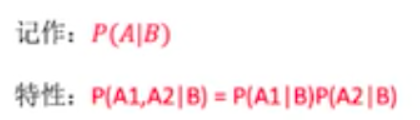

- 朴素贝叶斯算法公式：
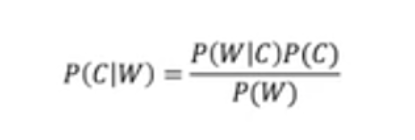

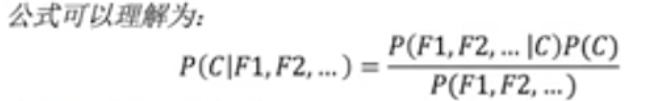

- 细节解释：
    - w为给定文档的特征，也就是文章中拆分出来的不同词语（词频统计）
    - c为文档的类别（财经，体育，军事......）

- 那么：一篇文档为财经和军事的概率计算如下
    - P(财经|词1，词2，词3)==》P(词1，词2，词3|财经)*P(财经)/P(W)
    - P(军事|词1，词2，词3)==》P(词1，词2，词3|军事)*P(军事)/P(W)
    - 上述两个公式中都有想用的P(W),可以抵消，则公式简化为：
        - P(词1，词2，词3|财经)*P(财经)==》P(W|C)*P(C)
        - P(词1，词2，词3|军事)*P(军事)==>P(W|C)*P(C)
        - 这样的公式我们是可以进行计算的，这就是条件概率
    - P(C):每个文档类别的概率（某个文档类别文章的数量/总文档数量）
    - P(W|C):给定类别下特征的概率，此处的特征就是预测文档中出现的词语
        - P(W|C)的计算方法：
            - P(F1|C)=Ni/N:F1为预测文档中的某一个词，C为指定的类别
                - Ni：F1这个词在C类别所有文档中出现的次数
                - N：所属类别C下的文档所有词出现的次数和

- 实例推导，请看题：

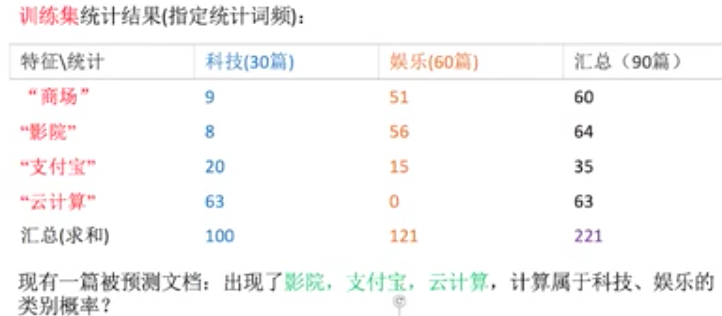

- 归属概率 = P(W|C)P(C)
- 解释：上图的表格为训练集的统计结果，训练集中一共有30篇科技文章，60篇娱乐文章，共计90篇文章。这些文章中根据tf-idf提取出重要的词语分别有(商场，影院，支付宝和云计算)，然后这些词分别在不同训练集中不同类别文章中出现的次数也统计出来了。
    - 现在有一个将要被预测的文章，该文章中出现重要的次为影院，支付宝和云计算，则计算该文章属于科技、娱乐的概率分别是多少？

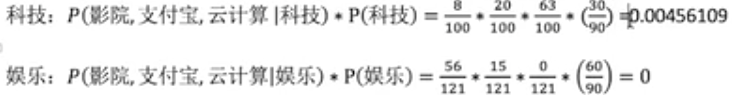

- 思考：属于某个类别的概率为0，合适吗？
    - 肯定不合适，虽然被预测文章中没有出现云计算这个词语，但是出现娱乐类别中的其他词，所以概率为0不合适！那么如何处理呢？

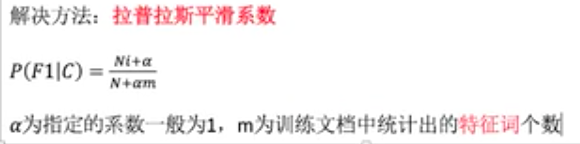

- 多项式朴素贝叶斯API
    - from sklearn.naive_bayes import MultinomialNB
    - MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        - alpha:拉普拉斯平滑系数

In [22]:
#导入模型
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

- 实战：数据使用- 实战：数据使用fetch_20newsgroups中的数据，包含了20个主题的18000个新闻组的帖子
    - 流程：
        - 加载20类新闻数据，并进行样本分割
        - 生成文章特征词
        - 使用模型进行文章分类

In [27]:
#加载数据集
dt.fetch_20newsgroups(data_home='./datasets',subset='all')
feature = data.data
target = data.target


{'data': ["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
  'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubjec

In [28]:
import sklearn.datasets as datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
news = datasets.fetch_20newsgroups(data_home='./')


- sklearn文本特征提取——TfidfVectorizer（求出Ni/N的值）
    - 什么是TF-IDF
        - 在信息检索中，tf-idf（词频-逆文档频率）是一种统计方法，用以评估一个单词在一个文档集合或语料库中的重要程度。
    - 原理：
        - TF-IDF实际上是：TF * IDF。主要思想是：如果某个词或短语在一篇文章中出现的频率高（即TF高），并且在其他文章中很少出现（即IDF高），则认为此词或者短语具有很好的类别区分能力，适合用来分类。[TF即是当前文档词频密度，IDF是本词在其他文章中的出现概率】
    - TF：表示一个给定词语t在一篇给定文档d中出现的频率。TF越高，则词语t对文档d来说越重要，TF越低，则词语t对文档d来说越不重要。那是否可以以TF作为文本相似度评价标准呢？答案是不行的，举个例子，常用的中文词语如“我”，“了”，“是”等，在给定的一篇中文文档中出现的频率是很高的，但这些中文词几乎在每篇文档中都具有非常高的词频，如果以TF作为文本相似度评价标准，那么几乎每篇文档都能被命中。
        - TF(w)=(词w在文档中出现的次数)/(文档的总词数) == P(F1|C)=Ni/N
    - IDF：逆向文章频率。有些词可能在文本中频繁出现，但并不重要，也即信息量小，如is,of,that这些单词或者“我”，“了”，“是”等，这些单词在语料库中出现的频率也非常大，我们就可以利用这点，降低其权重。
        

In [30]:
#实例化
tf = TfidfVectorizer()
feature = tf.fit_transform(feature)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

- 作用到鸢尾花分类中

In [32]:
iris = dt.load_iris()
feature = iris.data
target = iris.target

In [33]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [35]:
nb.score(x_test,y_test)

0.8333333333333334

In [36]:
nb.predict_proba(x_test[5].reshape((1,-1)))

array([[0.7245695, 0.173419 , 0.1020115]])

#### 伯努利模型BernoulliNB
- 介绍
    - 多项式朴素贝叶斯可同时处理二项分布(抛硬币)和多项分布(掷骰子)，其中二项分布又叫做伯努利分布，它是一种现实中常见，并且拥有很多优越数学性质的分布。因此，既然有着多项式朴素贝叶斯，我们自然也就又专门用来处理二项分布的朴素贝叶斯:伯努利朴素贝叶斯。
    - 与多项式模型一样，伯努利模型适用于离散特征的情况，所不同的是，数据集中可以存在多个特征，但每个特征都是二分类的.伯努利模型中每个特征的取值只能是1和0(以文本分类为例，某个单词在文档中出现过，则其特征值为1，否则为0).伯努利模型需要比MultinomialNB多定义一个二值化的方法，该方法会接受一个阈值并将输入的特征二值化(1，0).当然也可以直接采用MultinomialNB，但需要预先将输入的特征二值化.
- 作用：
    - 伯努利朴素贝叶斯与多项式朴素贝叶斯非常相似，都常用于处理文本分类数据。但由于伯努利朴素贝叶斯是处理二项 分布，所以它更加在意的是“是与否”。判定一篇文章是否属于体育资讯，而不是说属于体育类还是娱乐类。

- API：
    - class sklearn.naive_bayes.BernoulliNB (alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
    - 参数介绍：
        - alpha：拉普拉斯平滑系数
        - binarize：可以是数值或者不输入。如果不输入，则BernoulliNB认为每个数据特征都已经是二元（二值化）的。否则的话，小于binarize的会归为一类，大于binarize的会归为另外一类

- 二值化操作


In [37]:
from sklearn import preprocessing
import numpy as np
 
X = np.array([[1,-2,2,3,1,10],
             [1,2,3,33,4,-90],
             [11,29,90,-80,0,4]])
binarizer = preprocessing.Binarizer(threshold=3)#进行二值化
X_binarizer = binarizer.transform(X)
print("二值化（阈值：5）",X_binarizer)

二值化（阈值：5） [[0 0 0 0 0 1]
 [0 0 0 1 1 0]
 [1 1 1 0 0 1]]


- 模型的优缺点：
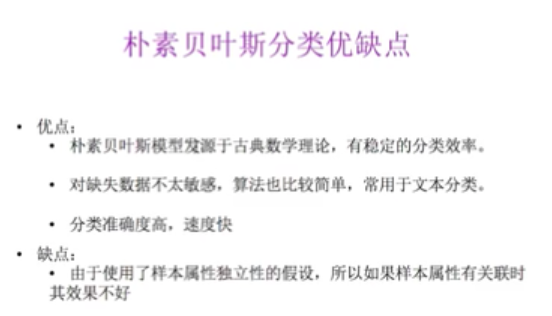